In [1]:
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,f1_score
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix

Best Threshold=0.016153, G-Mean=0.933


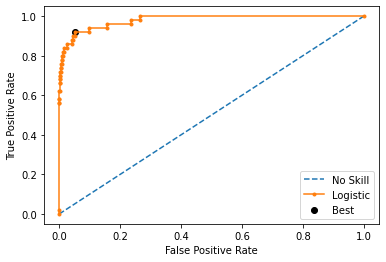

In [2]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [3]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def visualize_3d(X,y,algorithm="tsne",title="Data in 3D"):
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    
    if algorithm=="tsne":
        reducer = TSNE(n_components=3,random_state=47,n_iter=400,angle=0.6)
    elif algorithm=="pca":
        reducer = PCA(n_components=3,random_state=47)
    else:
        raise ValueError("Unsupported dimensionality reduction algorithm given.")
    
    if X.shape[1]>3:
        X = reducer.fit_transform(X)
    else:
        if type(X)==pd.DataFrame:
            X=X.values
    
    marker_shapes = ["circle","diamond", "circle-open", "square",  "diamond-open", "cross","square-open",]
    traces = []
    for hue in np.unique(y):
        X1 = X[y==hue]

        trace = go.Scatter3d(
            x=X1[:,0],
            y=X1[:,1],
            z=X1[:,2],
            mode='markers',
            name = str(hue),
            marker=dict(
                size=5,
                symbol=marker_shapes.pop(),
                line=dict(
                    width=int(np.random.randint(3,10)/10)
                ),
                opacity=int(np.random.randint(6,10)/10)
            )
        )
        traces.append(trace)


    layout = go.Layout(
        title=title,
        scene=dict(
            xaxis=dict(
                title='Dim 1'),
            yaxis=dict(
                title='Dim 2'),
            zaxis=dict(
                title='Dim 3'), ),
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

    
def visualize_2d(X,y,algorithm="tsne",title="Data in 2D",figsize=(8,8)):
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    if algorithm=="tsne":
        reducer = TSNE(n_components=2,random_state=47,n_iter=400,angle=0.6)
    elif algorithm=="pca":
        reducer = PCA(n_components=2,random_state=47)
    else:
        raise ValueError("Unsupported dimensionality reduction algorithm given.")
    if X.shape[1]>2:
        X = reducer.fit_transform(X)
    else:
        if type(X)==pd.DataFrame:
        	X=X.values
    f, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=figsize)
    sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
    ax1.set_title(title);
    plt.show();



In [4]:
# All unique features
X,y = make_classification(n_samples=7000, 
                          n_features=3, #feature that function gives
                          n_informative=3, #feature that is relevent with classes
                          n_redundant=0, #feature that is not relevent with classes
                          n_repeated=0, #duplicated features
                          n_classes=2, #how many cluster funciton gibes
                          n_clusters_per_class=2, #how many classters will be in per calasses
                          weights=[0.5,0.5], #How much point will be for each class
                          flip_y=0.03, #Noise fore the classes, big value hard classification
                          class_sep=0.1, #coralation between classes and the features, big value more coralation
                          hypercube=True, #If true class are coralete hypercube else polytope
                          scale=2,
                          shuffle=True,
                          random_state=77)
visualize_3d(X,y,algorithm="pca")

In [5]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.7, random_state=2, stratify=y)

Best Threshold=0.608097, LogisticRegression G-Mean=0.088
[21:13:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/batuhankose/dev/python/envs/P37/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Best Threshold=0.482062, XGBClassifier G-Mean=0.707
      0     1
0  1671   778
1   653  1798
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      2449
           1       0.70      0.73      0.72      2451

    accuracy                           0.71      4900
   macro avg       0.71      0.71      0.71      4900
weighted avg       0.71      0.71      0.71      4900

Max F1  0.7312295973884657
Threshold=0.346, XGBClassifier Values=8692.00000
      0     1
0  1402  1047
1   435  2016
              precision    recall  f1-score   support

           0       0.76      0.57      0.65      2449
           1       0.66      0.82      0.73      2451

    accuracy                           0.70      4900
   macro avg       0.71      0.70      0.69      4900
weighted avg       0.71      0.70      0.69      4900



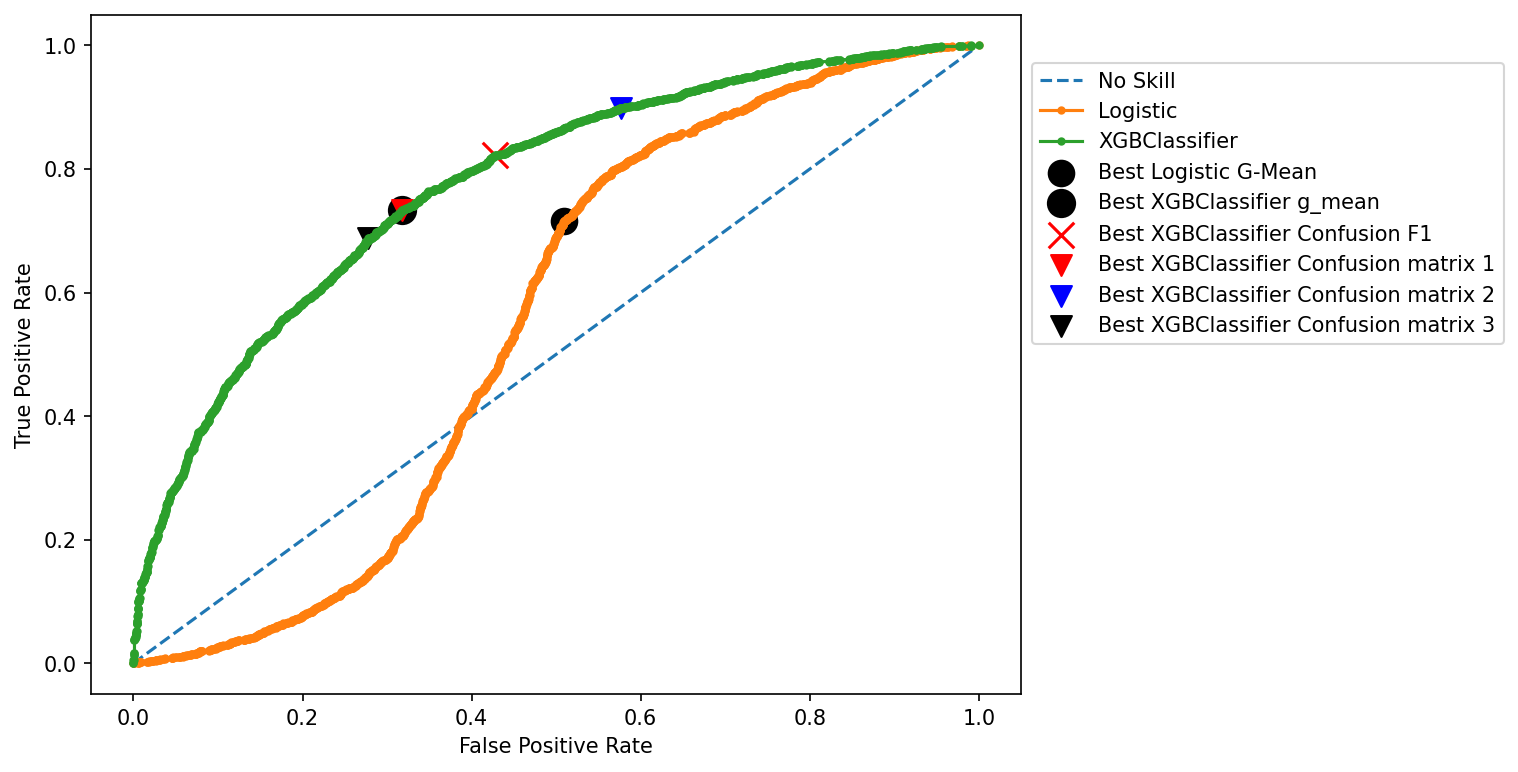

In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=150)

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
 
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix1 = argmax(gmeans)
print('Best Threshold=%f, LogisticRegression G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix1], tpr[ix1], s=150, marker='o', color='black', label='Best Logistic G-Mean')
 
model = XGBClassifier()
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix2 = argmax(gmeans)
print('Best Threshold=%f, XGBClassifier G-Mean=%.3f' % (thresholds[ix2], gmeans[ix2]))
print(pd.DataFrame(confusion_matrix(testy, to_labels(yhat, thresholds[ix2]))))
print(classification_report(testy, to_labels(yhat, thresholds[ix2])))

#Calculate succes with F1
f1_list = [f1_score(testy, to_labels(yhat, t)) for t in thresholds]
ix3 = argmax(f1_list)
print('Max F1 ',f1_list[ix3])

#Calculate succes with confusion matrix 1
tnv, fpv, fnv, tpv =   1,  1,  1,  1
cm_list=[]
cm_list = [confusion_matrix(testy, to_labels(yhat, t)).ravel() for t in thresholds]
values=[((t[0]*tnv)-(t[1]*fpv)-(t[2]*fnv)+(t[3]*tpv)) for t in cm_list]
ix4=argmax(values)

#Calculate succes with confusion matrix 2
tnv, fpv, fnv, tpv =   1,  2,  5,  3
values=[((t[0]*tnv)-(t[1]*fpv)-(t[2]*fnv)+(t[3]*tpv)) for t in cm_list]
ix5=argmax(values)

#Calculate succes with confusion matrix 3
tnv, fpv, fnv, tpv =   4,  2,  2,  3
values=[((t[0]*tnv)-(t[1]*fpv)-(t[2]*fnv)+(t[3]*tpv)) for t in cm_list]
ix6=argmax(values)


print('Threshold=%.3f, XGBClassifier Values=%.5f' % (thresholds[ix3],values[ix3]))
print(pd.DataFrame(confusion_matrix(testy, to_labels(yhat, thresholds[ix3]))))
print(classification_report(testy, to_labels(yhat, thresholds[ix3])))
 
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='XGBClassifier')
pyplot.scatter(fpr[ix2], tpr[ix2], s=170,marker='o', color='black', label='Best XGBClassifier g_mean')
pyplot.scatter(fpr[ix3], tpr[ix3], s=150,marker='x', color='red'  ,label='Best XGBClassifier Confusion F1')
pyplot.scatter(fpr[ix4], tpr[ix4], s=100,marker='v', color='red',  label='Best XGBClassifier Confusion matrix 1')
pyplot.scatter(fpr[ix5], tpr[ix5], s=100,marker='v', color='blue', label='Best XGBClassifier Confusion matrix 2')
pyplot.scatter(fpr[ix6], tpr[ix6], s=100,marker='v', color='black',label='Best XGBClassifier Confusion matrix 3')
 
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
# show the plot
pyplot.show()

In [7]:
tnv, fpv, fnv, tpv = 1,4,4,1
t0, i = thresholds[ix3] , 0
t_step=0.01
t_m_old=t0
t_p_old=t0
left_go  = True 
right_go = True 
#All values 
a = np.c_[yhat,testy]
print(confusion_matrix(a[:,1], to_labels(a[:,0], t0 )))
tn_0, fp_0, fn_0, tp_0 = confusion_matrix(a[:,1], to_labels(a[:,0], t0 )).ravel()
value_0 = ((tn_0*tnv)- (fp_0*fpv) -(fn_0*fnv) +(tp_0*tpv))
print('Start Value ',value_0)
while(i<90 and (left_go or right_go)):
    i+=1
    print('Loop id ',i)
    #Cut off for left is t_m, right is t_p
    t_m=t_m_old-t_step if  left_go  else t_m_old
    t_p=t_p_old+t_step if  right_go else t_p_old

    a_f = a[(( a[:,0] < t_m)   | ( a[:,0] > t_p))]
    print(confusion_matrix(a_f[:,1], to_labels(a_f[:,0], t0 )))
    #a_old is data of the one iter before, 
    a_old = a[(( a[:,0] < t_m_old)   | ( a[:,0] > t_p_old ))]
    #b is data of moved cut off one step left
    b     = a[(( a[:,0] < t_m)       | ( a[:,0] > t_p_old ))]
    #c is data of moved cut off one step right
    c     = a[(( a[:,0] < t_m_old )  | ( a[:,0] > t_p     ))]
    #Calculate values for a,b,c
    tn_a, fp_a, fn_a, tp_a = confusion_matrix(a_old[:,1], to_labels(a_old[:,0], (t_m_old+t_p_old)/2 )).ravel()
    tn_b, fp_b, fn_b, tp_b = confusion_matrix(b[:,1], to_labels(b[:,0], (t_m+t_p)/2)).ravel()
    tn_c, fp_c, fn_c, tp_c = confusion_matrix(c[:,1], to_labels(c[:,0], (t_m+t_p)/2)).ravel()
    value_a = ((tn_a*tnv)- (fp_a*fpv) -(fn_a*fnv) +(tp_a*tpv))
    value_b = ((tn_b*tnv)- (fp_b*fpv) -(fn_b*fnv) +(tp_b*tpv))
    value_c = ((tn_c*tnv)- (fp_c*fpv) -(fn_c*fnv) +(tp_c*tpv))
    t_m_old=t_m
    t_p_old=t_p
    print(tn_a, fp_a, fn_a, tp_a)
    print(tn_b, fp_b, fn_b, tp_b)
    print(tn_c, fp_c, fn_c, tp_c)
    print(value_a,value_b,value_c)
    #Deciding which directions to go
    left_go  = True if value_b > value_a else False
    right_go = True if value_c > value_a else False
    print('Left  ',left_go )
    print('Right ',right_go)
    print('t_m ',round(t_m,4))
    print('t_p ',round(t_p,4))    
    print('------'*3)
print('Finish')
t_m=t_m_old if  left_go  else t_m_old+t_step
t_p=t_p_old if  right_go else t_p_old-t_step
print('t_m ',round(t_m,4))
print('t_p ',round(t_p,4))
a_f = a[(( a[:,0] < t_m)   | ( a[:,0] > t_p))]
print(confusion_matrix(a_f[:,1], to_labels(a_f[:,0], t0 )))
tn_f, fp_f, fn_f, tp_f = confusion_matrix(a_f[:,1], to_labels(a_f[:,0], t0 )).ravel()
value_f = ((tn_f*tnv)- (fp_f*fpv) -(fn_f*fnv) +(tp_f*tpv))
print('Finish Value ',value_f)
print('Start  with ',a.shape[0],' item')
print('Finish with ',a_f.shape[0],' item')
print('Coverage rate ',round((a_f.shape[0]/a.shape[0]),3 ))

[[1402 1047]
 [ 435 2016]]
Start Value  -2510
Loop id  1
[[1369 1024]
 [ 425 1985]]
1402 1047 435 2015
1369 1047 425 2015
1402 1024 435 1985
-2511 -2504 -2449
Left   True
Right  True
t_m  0.3358
t_p  0.3558
------------------
Loop id  2
[[1354 1007]
 [ 410 1969]]
1369 1024 425 1985
1354 1024 410 1985
1369 1007 425 1969
-2442 -2397 -2390
Left   True
Right  True
t_m  0.3258
t_p  0.3658
------------------
Loop id  3
[[1332  987]
 [ 401 1955]]
1354 1007 410 1969
1332 1007 401 1969
1354 987 410 1955
-2345 -2331 -2279
Left   True
Right  True
t_m  0.3158
t_p  0.3758
------------------
Loop id  4
[[1300  960]
 [ 389 1942]]
1332 987 401 1955
1300 987 389 1955
1332 960 401 1942
-2265 -2249 -2170
Left   True
Right  True
t_m  0.3058
t_p  0.3858
------------------
Loop id  5
[[1278  944]
 [ 378 1929]]
1300 960 389 1942
1278 960 378 1942
1300 944 389 1929
-2154 -2132 -2103
Left   True
Right  True
t_m  0.2958
t_p  0.3958
------------------
Loop id  6
[[1250  919]
 [ 359 1912]]
1278 944 378 1929
1250 

In [8]:
print('If we predict all data CM will be like that')
print(confusion_matrix(a[:,1], to_labels(a[:,0], t0 )))
print('We will not predict this data')
a_mid = a[(( a[:,0] >  t_m)   & ( a[:,0] < t_p))]
print(confusion_matrix(a_mid[:,1], to_labels(a_mid[:,0], t0 )))
print('After elimination some of the data confusion matrix will be like that.')
print(confusion_matrix(a_f[:,1], to_labels(a_f[:,0], t0 )))


If we predict all data CM will be like that
[[1402 1047]
 [ 435 2016]]
We will not predict this data
[[ 373  887]
 [ 187 1184]]
After elimination some of the data confusion matrix will be like that.
[[1029  160]
 [ 248  832]]


In [9]:
cm1=confusion_matrix(a[:,1], to_labels(a[:,0], t0 )).ravel()
cm2=confusion_matrix(a_mid[:,1], to_labels(a_mid[:,0], t0 )).ravel()
cm3=confusion_matrix(a_f[:,1], to_labels(a_f[:,0], t0 )).ravel()
print('Accuracy of All Data      =',(cm1[0]+cm1[3])/(cm1[0]+cm1[1]+cm1[2]+cm1[3]))
print('Accuracy of Not used Data =',(cm2[0]+cm2[3])/(cm2[0]+cm2[1]+cm2[2]+cm2[3]))
print('Accuracy of Used Data     =',(cm3[0]+cm3[3])/(cm3[0]+cm3[1]+cm3[2]+cm3[3]))

Accuracy of All Data      = 0.6975510204081633
Accuracy of Not used Data = 0.5917901938426454
Accuracy of Used Data     = 0.8201851035698545


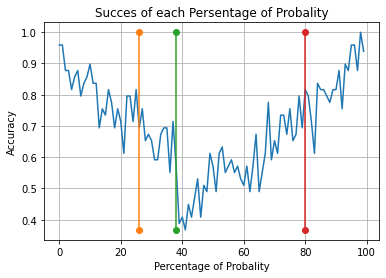

In [10]:
import matplotlib.pyplot as plt

# Lets See thresholds percentage on graph

#Calculate data for graph
#Add prediction as a new column
a_per=np.c_[ a, to_labels(a[:,0], t0 )]  

#Add success to new column
a_per=np.c_[ a_per,np.where(a_per[:,1]==a_per[:,2],1,0)]

#Sort array for predictions and get success data
temp1=a_per[a_per[:, 0].argsort()][:,3]

# np.where(temp[:,0]>t_m,1,0)  gives us a array of 0 and 1 that is lower form t_m values
# np.unique gives counts of the uniq values in the array
# I divide zero count to orjinal array size and multipliye with 100 and get Percentage for thresholds
temp2=a_per[a_per[:, 0].argsort()]
t_m_radip = round((np.unique(np.where(temp2[:,0]>t_m,1,0), return_counts=True)[1][0]/len(temp2))*100)
t_0_radip = round((np.unique(np.where(temp2[:,0]>t0 ,1,0), return_counts=True)[1][0]/len(temp2))*100)
t_p_radip = round((np.unique(np.where(temp2[:,0]>t_p,1,0), return_counts=True)[1][0]/len(temp2))*100)

#Define x,y points for the threshols lines
x1=[t_m_radip,t_m_radip]
x2=[t_0_radip,t_0_radip]
x3=[t_p_radip,t_p_radip]

# X is percentage and it is range wit  zero to 100, actual 0 to 1
x = np.arange(0, 100, 1)
# Y is accuracy for the all percentage of the data, 
# first split cucces column to 100
# then sum the chunks and divide to junk size
y = [sum(array)/(len(temp1)/100) for array in np.array_split(temp1,  100)]

#Define y points as minimum ACC point so graph is not so big
y_min=min(y)
y1=[y_min,1]
y2,y3 = y1,y1

#Graph code 
fig, ax = plt.subplots()
ax.plot(x, y)

ax.plot(x1, y1, x2, y2,x3, y3,  marker = 'o')


ax.set(xlabel='Percentage of Probality', ylabel='Accuracy',
       title='Succes of each Persentage of Probality')
ax.grid()
plt.show()